## This Notebook will primarily be used for the capstone project of the "IBM Data Science Professional Certificate" series, offered via Coursera. After completion of the course, I may further update and modify the project, as my skills in data science and python expand.

### Part A:

#### First, the needed assests are gathered.

In [1]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 62kB/s  eta 0:00:01     |██████▏                         | 276kB 2.3MB/s eta 0:00:01████▍               | 737kB 2.3MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [2]:
import numpy as np

!pip install pandas --upgrade pandas --ignore-installed pytz
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from bs4 import BeautifulSoup as bsp

!pip install geopy
from geopy.geocoders import Nominatim

import json 

import requests

from pandas.io.json import json_normalize  

import matplotlib.cm as cm 
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

!pip install folium
import folium 

     |████████████████████████████████| 10.3 MB 4.1 kB/s eta 0:00:01    |██▋                             | 819 kB 2.5 MB/s eta 0:00:04
  Using cached pytz-2019.3-py2.py3-none-any.whl (509 kB)
     |████████████████████████████████| 20.0 MB 7.5 kB/s eta 0:00:01    |█████████████████▋              | 11.0 MB 31 kB/s eta 0:04:47     |████████████████████▎           | 12.7 MB 1.1 MB/s eta 0:00:07     |█████████████████████████▋      | 16.0 MB 1.6 MB/s eta 0:00:03     |██████████████████████████████▍ | 19.0 MB 1.2 MB/s eta 0:00:01
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
ERROR: azure-core 1.0.0 has requirement requests>=2.18.4, but you'll have requests 2.14.2 which is incompatible.
ERROR: azure-storage-queue 12.0.0 has requirement cryptography>=2.1.4, but you'll have cryptography 2.0.3 which is incompatible.
ERROR: azure-storage-blob 12.0.0 has requirement cryptography>=2.1.4, but you'll have cryptography 2.0.3 which is incompatible.
ERROR: msrest 0.6.10 has require

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


     |████████████████████████████████| 104 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 91 kB 347 kB/s eta 0:00:011
     |████████████████████████████████| 125 kB 619 kB/s eta 0:00:01
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.8
    Uninstalling Jinja2-2.8:
      Successfully uninstalled Jinja2-2.8


#### Next, the website that will be scraped is stored.

In [3]:
T_post_url=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

#### Beautiful Soup is used it to take a look at the website's raw data.

In [4]:
soup=bsp(T_post_url,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XptIjwpAICAAABWenZ0AAABI","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":951325562,"wgRevisionId":951325562,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario

#### From the raw web data, it is narrowed down to the raw postal data - which can be found in the raw data as a table.

In [5]:
T_post_table=soup.find('table')
T_post_table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park / Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor / Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park / Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern / Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3B
</td>
<td>North York
</td>
<td>Don Mills
</td></tr>
<tr>
<td>M4B
</td>
<td>Ea

#### From the table, the headers and rows are stored. The headers are returned, as they will determine the column names in the forthcoming dataframe.

In [6]:
T_post_headers=T_post_table.findAll('th')
T_post_rows=T_post_table.findAll('tr')
T_post_headers

[<th>Postal code
 </th>, <th>Borough
 </th>, <th>Neighborhood
 </th>]

#### The raw table is parsed to create the dataframe.

In [7]:
T_post_data=[]
for tr in T_post_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    T_post_data.append(row)
T_post_df=pd.DataFrame(T_post_data, columns=['Postal Code', 'Borough' , 'Neighborhood'])
T_post_df.head()

,Postal Code,Borough,Neighborhood
0,None,None,None
1,M1A\n,Not assigned\n,\n
2,M2A\n,Not assigned\n,\n
3,M3A\n,North York\n,Parkwoods\n
4,M4A\n,North York\n,Victoria Village\n


#### The new line characters are removed.

In [8]:
T_post_df.replace('\n','', regex=True, inplace=True)
T_post_df.head()

,Postal Code,Borough,Neighborhood
0,None,None,None
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village


#### The row of value "None" is removed.

In [9]:
T_post_df.drop([0],inplace=True)
T_post_df.head()

,Postal Code,Borough,Neighborhood
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Regent Park / Harbourfront


#### The Neightborhood column is checked for blank rows. It can be seen that this only occurs where the Borough is "Not assigned."

In [10]:
check=T_post_df[T_post_df.Neighborhood=='']
check.groupby(['Borough']).nunique()

,Postal Code,Borough,Neighborhood
Borough,,,
Not assigned,77,1,1


#### As the "Not assigned" Boroughs are being removed here, doing so will also eliminate all blank Neighborhoods.

In [11]:
T_post_df=T_post_df[T_post_df.Borough != 'Not assigned']
T_post_df.head()

,Postal Code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Regent Park / Harbourfront
6,M6A,North York,Lawrence Manor / Lawrence Heights
7,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


#### The syntax is changed from " / " to ", " when multiple Neighborhoods share a Postal Code. This is done for the sake of the eventual clustering that will be done.

In [12]:
T_post_df.replace(' / ',', ', regex=True, inplace=True)
T_post_df.head()

,Postal Code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


#### The index is reset.

In [13]:
T_post_df.reset_index(drop=True, inplace=True)
T_post_df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


#### The shape of the dataframe is verified.

In [14]:
T_post_df.shape

(103, 3)

### Part B

#### A new dataframe with geographic coordinates, by postal code, is created from a .csv file. 

In [15]:
LL_df=pd.read_csv('https://cocl.us/Geospatial_data')
LL_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### The shape of the latitude/longitude dataframe is compared against that of the postal dataframe 

In [16]:
T_post_df.shape==LL_df.shape

True

#### As the shapes are the same, and each has a "Postal Code" column, the two dataframes can be easily merged.

In [17]:
T_merged_df=pd.merge(T_post_df, LL_df, on='Postal Code', how='outer')
T_merged_df.head(12)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


#### Once more, the shape is checked

In [18]:
T_merged_df.shape

(103, 5)

### Part C

#### The latitude and longitude for Toronto are found to generate centered maps

In [19]:
toronto='Toronto, CA'

locator=Nominatim(user_agent='ca_explorer')
location=locator.geocode(toronto)
T_lat=location.latitude
T_long=location.longitude
print('({}, {})'.format(T_lat, T_long))

(43.6534817, -79.3839347)


#### Using the latitude and longitude, a map is generated using folium to visualize the neighborhood locations

In [20]:
T_map=folium.Map(location=[T_lat, T_long], zoom_start=11)

for lat, long, borough, neighborhood in zip(T_merged_df['Latitude'], T_merged_df['Longitude'], T_merged_df['Borough'], T_merged_df['Neighborhood']):
    label='{}, {}'.format(neighborhood, borough)
    label=folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(T_map)  
    
T_map

#### Define some needed variables here

In [ ]:
CLIENT_ID = #REDACTED
CLIENT_SECRET = #REDACTED
VERSION = '20180605'
LIMIT=100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#### The 'getNearbyVenues' function is defined to request venue information from Foursquare, within an established radius of 500 meters from the latitude and longitude of a named point

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results=requests.get(url).json()['response']['groups'][0]['items']
        
        venues.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby=pd.DataFrame([item for venue in venues for item in venue])
    nearby.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby)

#### 'getNearbyVenues' is called, taking the neighborhoods and their geographic centers as the required inputs

In [25]:
fsquare_data=getNearbyVenues(names=T_merged_df['Neighborhood'],
                         latitudes=T_merged_df['Latitude'],
                         longitudes=T_merged_df['Longitude'])

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview
The Danforth West, Ri

#### To limit the calls to Foursquare while working on the data, it is copied for further analysis

In [26]:
T_venues=fsquare_data

#### The shape of the data, and its head, are observed to check for errors

In [27]:
print(T_venues.shape)
T_venues.head()

(2128, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


#### To see how many venues fall within each neighborhood, the data is grouped by count

In [28]:
T_count=T_venues.groupby('Neighborhood').count()
T_count

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Wilson Heights, Downsview North",20,20,20,20,20,20
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
Berczy Park,57,57,57,57,57,57
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
Business reply mail Processing CentrE,18,18,18,18,18,18


#### Unique venue types are inspected, to determine what to explore further

In [29]:
T_venues['Venue Category'].unique()

array(['Park', 'Food & Drink Shop', 'Construction & Landscaping',
       'Hockey Arena', 'Coffee Shop', 'Portuguese Restaurant',
       'French Restaurant', 'Intersection', 'Pizza Place', 'Bakery',
       'Breakfast Spot', 'Distribution Center', 'Spa', 'Restaurant',
       'Gym / Fitness Center', 'Historic Site', 'Farmers Market',
       'Chocolate Shop', 'Pub', 'Performing Arts Venue', 'Dessert Shop',
       'Mexican Restaurant', 'Yoga Studio', 'Café', 'Theater',
       'Event Space', 'Ice Cream Shop', 'Shoe Store', 'Art Gallery',
       'Asian Restaurant', 'Cosmetics Shop', 'Bank', 'Electronics Store',
       'Beer Store', 'Hotel', 'Health Food Store', 'Wine Shop',
       'Antique Shop', 'Boutique', 'Furniture / Home Store',
       'Vietnamese Restaurant', 'Clothing Store', 'Accessories Store',
       "Women's Store", 'Gift Shop', 'Miscellaneous Shop',
       'Sushi Restaurant', 'Italian Restaurant', 'Creperie', 'Beer Bar',
       'Arts & Crafts Store', 'Burrito Place', 'Hobby Shop',

#### With this many unique venue types, there will be a lot of noise in the data; similar types of venues should be combined

In [32]:
T_venues.replace(dict.fromkeys(['Portuguese Restaurant', 'French Restaurant', 'Breakfast Spot', 
        'Restaurant', 'Mexican Restaurant', 'Ice Cream Shop', 'Asian Restaurant', 'Vietnamese Restaurant', 
        'Italian Restaurant', 'Sushi Restaurant', 'Creperie', 'Burrito Place', 'Diner', 'Fried Chicken Joint', 
        'Burger Joint', 'Sandwich Place', 'Fast Food Restaurant', 'Caribbean Restaurant', 'Japanese Restaurant',
        'Gastropub', 'Pizza Place', 'Ramen Restaurant', 'Thai Restaurant', 'Steakhouse', 'American Restaurant', 
        'Middle Eastern Restaurant', 'Modern European Restaurant', 'Seafood Restaurant', 'Chinese Restaurant', 
        'Ethiopian Restaurant', 'Poutine Place', 'Greek Restaurant', 'Dim Sum Restaurant', 'BBQ Joint', 
        'Food Truck', 'New American Restaurant', 'Vegetarian / Vegan Restaurant', 'German Restaurant', 
        'Comfort Food Restaurant', 'Irish Pub', 'Moroccan Restaurant', 'Belgian Restaurant', 'Bistro',
        'Bagel Shop', 'Eastern European Restaurant', 'Korean Restaurant', 'Fish & Chips Shop', 'Indian Restaurant',
        'Falafel Restaurant', 'Salad Place', 'Donut Shop', 'Deli / Bodega', 'Hakka Restaurant', 
        'Mediterranean Restaurant', 'Dog Run', 'Frozen Yogurt Shop', 'Colombian Restaurant', 'Brazilian Restaurant',
        'Gluten-free Restaurant', 'Latin American Restaurant', 'Cupcake Shop', 'Soup Place', 'Food Court',
        'South American Restaurant', 'Cuban Restaurant', 'Taco Place', 'Cafeteria', 'Poke Place', 
        'Empanada Restaurant', 'Indonesian Restaurant', 'Cajun / Creole Restaurant', 'Noodle House', 'Food', 
        'Doner Restaurant', 'Filipino Restaurant', 'Dumpling Restaurant', 'Airport Food Court',
        'Molecular Gastronomy Restaurant', 'Taiwanese Restaurant', 'Snack Place', 'Theme Restaurant',
        'Wings Joint', 'Turkish Restaurant', 'Bakery'], 'Eateries'), inplace=True)

T_venues.replace(dict.fromkeys(['Coffee Shop', 'Pub', 'Café', 'Beer Bar', 'Juice Bar', 'Bar', 'Tea Room', 
        'Bubble Tea Shop', 'Cocktail Bar', 'Wine Bar', 'Sports Bar', 'Brewery', 'Speakeasy', 'Hotel Bar', 
        'Gay Bar', 'Sake Bar'], 'Drinks'), inplace=True)

T_venues.replace(dict.fromkeys(['Food & Drink Shop', 'Farmers Market', 'Chocolate Shop', 'Dessert Shop', 
        'Shoe Store', 'Art Gallery', 'Cosmetics Shop', 'Electronics Store', 'Beer Store', 'Health Food Store', 
        'Antique Shop', 'Boutique', 'Furniture / Home Store', 'Clothing Store', 'Accessories Store',
        'Gift Shop', 'Miscellaneous Shop', 'Sporting Goods Shop', 'Arts & Crafts Store', 'Hobby Shop', 
        'Discount Store', 'Pet Store', 'Comic Shop', 'Shopping Mall', 'Bookstore', 'Department Store', 
        'Video Game Store', 'Lingerie Store', 'Smoke Shop', 'Bike Shop', 'Supermarket', 'Video Store',
        'Grocery Store', 'Tailor Shop', 'Cheese Shop', 'Optical Shop', 'Fish Market', 'Convenience Store',
        'Liquor Store', 'Gourmet Shop', "Women's Store", 'Candy Store', 'Baby Store', 'Bridal Shop', 
        'Warehouse Store', 'Wine Shop', 'Toy / Game Store', 'Supplement Shop', 'Luggage Store', 'Record Shop',
        "Men's Store", 'Fruit & Vegetable Store', 'Stationery Store', 'Jewelry Store', 'Flea Market', 
        'Mobile Phone Shop', 'Knitting Store', 'Organic Grocery', 'Flower Shop', 'Thrift / Vintage Store',
        'Drugstore', 'Market', 'Garden Center', 'Hardware Store', 'Kids Store', 'Board Shop', 'Camera Store', 
        'Butcher', 'Costume Shop', 'Shopping Plaza'], 'Shopping'), inplace=True)

T_venues.replace(dict.fromkeys(['Gym / Fitness Center', 'Gym', 'Athletics & Sports', 'Skating Rink', 'Curling Ice',
        'Pool', 'Golf Course', 'Baseball Field', 'Climbing Gym', 'Soccer Field', 'Dance Studio', 'Martial Arts Dojo', 
        'Basketball Court', 'Swim School', 'Yoga Studio', 'College Gym', 'Skate Park'], 'Athletics'), inplace=True)

T_venues.replace(dict.fromkeys(['Park', 'Plaza', 'Lake', 'Other Great Outdoors', 'Fountain', 'Field', 'Trail', 'Beach',
        'Playground', 'Roof Deck', 'Scenic Lookout', 'Monument / Landmark', 'Garden', 'Sculpture Garden',
        'Outdoor Sculpture', 'River'], 'Outdoors'), inplace=True)

T_venues.replace(dict.fromkeys(['Spa', 'Bank', 'Pharmacy', 'Tanning Salon', 'Construction & Landscaping', 
        'Salon / Barbershop', 'Medical Center', 'Gas Station', 'Massage Studio', 'IT Services', 'Home Service', 
        'Food Service', 'Health & Beauty Service', 'Hospital', 'Nail Salon', 'Church', 'Auto Workshop',
        'Auto Garage', 'Locksmith'], 'Services'), inplace=True)

T_venues.replace(dict.fromkeys(['Hotel', 'Rental Car Location', 'General Travel', 'Bus Station', 'Train Station', 
        'Airport', 'Bus Line', 'Metro Station', 'Motel', 'Bed & Breakfast', 'Light Rail Station', 'Airport Lounge', 
        'Harbor / Marina', 'Airport Terminal', 'Airport Gate', 'Plane', 'Airport Service', 
        'Boat or Ferry'], 'Travel'), inplace=True)

T_venues.replace(dict.fromkeys(['Hockey Arena', 'Performing Arts Venue', 'Theater', 'Event Space', 'Music Venue', 
        'Lounge', 'Movie Theater', 'Hookah Bar', 'Concert Hall', 'Jazz Club', 'Indoor Play Area', 'Basketball Stadium', 
        'Nightclub', 'Baseball Stadium', 'Convention Center', 'Indie Movie Theater', 'General Entertainment', 'Stadium', 
        'College Stadium', 'Gaming Cafe', 'Opera House', 'Strip Club', 'Social Club'], 'Entertainment'), inplace=True)

T_venues.replace(dict.fromkeys(['Historic Site', 'College Auditorium', 'College Rec Center', 'Museum', 'Art Museum', 
        'Aquarium', 'History Museum', 'College Arts Building'], 'Educational'), inplace=True)

T_venues.replace(dict.fromkeys(['Distribution Center', 'Intersection', 'Office', 'Neighborhood', 'Building',
        'Business Service', 'Coworking Space', 'Recording Studio'], 'Business Development'), inplace=True)

#### Double-check the unique venues

In [33]:
T_venues['Venue Category'].unique()

array(['Outdoors', 'Shopping', 'Services', 'Entertainment', 'Drinks',
       'Eateries', 'Business Development', 'Athletics', 'Educational',
       'Travel'], dtype=object)

#### The final trimming of the dataframe is defined and the index is reset

In [34]:
T_final=T_venues.reset_index(drop=True)

#### From the final dataframe, a one hot encoding is generated

In [35]:
T_onehot=pd.get_dummies(T_final[['Venue Category']], prefix="", prefix_sep="")

T_onehot['Neighborhood']=T_final['Neighborhood'] 

fixed_columns=[T_onehot.columns[-1]] + list(T_onehot.columns[:-1])
T_onehot=T_onehot[fixed_columns]

T_onehot.head()

,Neighborhood,Athletics,Business Development,Drinks,Eateries,Educational,Entertainment,Outdoors,Services,Shopping,Travel
0,Parkwoods,0,0,0,0,0,0,1,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,1,0
2,Parkwoods,0,0,0,0,0,0,0,1,0,0
3,Victoria Village,0,0,0,0,0,1,0,0,0,0
4,Victoria Village,0,0,1,0,0,0,0,0,0,0


#### The one hot encoding is grouped by neighborhood and normalized, based on the number of venues in the neighborhood

In [36]:
T_final_grouped=T_onehot.groupby('Neighborhood').mean().reset_index()
T_final_grouped

,Neighborhood,Athletics,Business Development,Drinks,Eateries,Educational,Entertainment,Outdoors,Services,Shopping,Travel
0,Agincourt,0.200000,0.000000,0.000000,0.400000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000
1,"Alderwood, Long Branch",0.400000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0.000000,0.100000,0.500000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000
3,Bayview Village,0.000000,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
4,"Bedford Park, Lawrence Manor East",0.000000,0.000000,0.200000,0.600000,0.000000,0.000000,0.000000,0.080000,0.120000,0.000000
5,Berczy Park,0.000000,0.000000,0.210526,0.421053,0.017544,0.052632,0.052632,0.000000,0.228070,0.017544
6,"Birch Cliff, Cliffside West",0.250000,0.000000,0.250000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
7,"Brockton, Parkdale Village, Exhibition Place",0.090909,0.045455,0.272727,0.272727,0.000000,0.136364,0.000000,0.000000,0.181818,0.000000
8,Business reply mail Processing CentrE,0.111111,0.055556,0.055556,0.222222,0.000000,0.000000,0.111111,0.111111,0.222222,0.111111
9,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.000000,0.111111,0.055556,0.000000,0.000000,0.055556,0.000000,0.055556,0.722222


#### The 'return_CVs' function is defined to pull the type of venues with the highest normalized values from the one hot encoding, as these correspond to the most common venue types

In [37]:
def return_CVs(row, top_n):
    row_cats=row.iloc[1:]
    row_cats_sorted=row_cats.sort_values(ascending=False)
    
    return row_cats_sorted.index.values[0:top_n]

#### The top five venue types are stored for each neighborhood, using 'return_CVs' and the head is returned to verify

In [38]:
top_n=5

indicators=['st', 'nd', 'rd']

columns=['Neighborhood']
for i in np.arange(top_n):
    try:
        columns.append('{}{} Most Common Venue'.format(i+1, indicators[i]))
    except:
        columns.append('{}th Most Common Venue'.format(i+1))

T_top=pd.DataFrame(columns=columns)
T_top['Neighborhood']=T_final_grouped['Neighborhood']

for i in np.arange(T_final_grouped.shape[0]):
    T_top.iloc[i, 1:]=return_CVs(T_final_grouped.iloc[i, :], top_n)

T_top.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Agincourt,Eateries,Shopping,Entertainment,Athletics,Travel
1,"Alderwood, Long Branch",Athletics,Eateries,Drinks,Services,Travel
2,"Bathurst Manor, Wilson Heights, Downsview North",Eateries,Shopping,Services,Drinks,Travel
3,Bayview Village,Eateries,Services,Drinks,Travel,Shopping
4,"Bedford Park, Lawrence Manor East",Eateries,Drinks,Shopping,Services,Travel


#### A range of k-values are plotted, to look for an elbow point; thereby determining the optimal number of groups

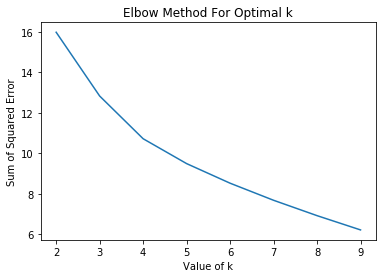

In [39]:
SSEs=[]

T_clusters=T_final_grouped.drop('Neighborhood', 1)

K=range(2,10)

for k in K:
    km=KMeans(n_clusters=k, random_state=0, n_init=1000)
    km=km.fit(T_clusters)
    SSEs.append(km.inertia_)
    
plt.plot(K, SSEs)
plt.xlabel('Value of k')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method For Optimal k')
plt.show()

#### The silhouette scores will be checked for further investigation of an optimal k-value

In [40]:
SSEs=[]

T_clusters=T_final_grouped.drop('Neighborhood', 1)

K=range(2,10)

for k in K:
    km=KMeans(n_clusters=k, random_state=0, n_init=1000)
    preds=km.fit_predict(T_clusters)
    
    score = silhouette_score(T_clusters, preds)
    print("For k={}, silhouette score is {})".format(k, score))

For k=2, silhouette score is 0.41192239665082314)
For k=3, silhouette score is 0.2725304590456559)
For k=4, silhouette score is 0.30172791514602043)
For k=5, silhouette score is 0.2661069532594905)
For k=6, silhouette score is 0.27425728517964443)
For k=7, silhouette score is 0.2726689421027899)
For k=8, silhouette score is 0.274096797042155)
For k=9, silhouette score is 0.2735776903834342)


#### There is an elbow point at k=4, and a relatively high silhouette score, so four clusters will be generated

In [41]:
k=4

kmeans=KMeans(n_clusters=k, random_state=0, n_init=1000).fit(T_clusters)

kmeans.labels_[0:12] 

array([3, 0, 3, 3, 3, 3, 0, 3, 1, 1, 2, 3], dtype=int32)

#### The cluster labels are added to the top venues data and the geographic data is merged from the earlier dataframe

In [42]:
T_top.insert(0, 'Cluster Labels', kmeans.labels_)

T_merged_final=T_merged_df.join(T_top.set_index('Neighborhood'), on='Neighborhood', how='right')

T_merged_final.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,1,Shopping,Services,Outdoors,Travel,Entertainment
1,M4A,North York,Victoria Village,43.725882,-79.315572,3,Eateries,Entertainment,Drinks,Business Development,Travel
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Drinks,Shopping,Eateries,Entertainment,Outdoors
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1,Shopping,Entertainment,Eateries,Drinks,Travel
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,3,Drinks,Eateries,Shopping,Services,Entertainment


#### The index are reset for the final, merged, dataframe

In [43]:
T_merged_final.reset_index(drop=True, inplace=True)

#### Now, folium can be used to visualize the clustered neighborhoods

In [46]:
cluster_map=folium.Map(location=[T_lat, T_long], zoom_start=11)

clusters=k
x=np.arange(k)
ys=[i + x + (i*x)**2 for i in range(clusters)]
colors_array=cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow=[colors.rgb2hex(i) for i in colors_array]

markers_colors=[]
for lat, long, poi, cluster in zip(T_merged_final['Latitude'], T_merged_final['Longitude'], T_merged_final['Neighborhood'], T_merged_final['Cluster Labels']):
    label=folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=1.5).add_to(cluster_map)
       
cluster_map

#### A more detailed look at the first cluster (red): The primary venue type for this category appears to be service venues, travel is secondary; Outdoors is tertiary

In [47]:
Cluster1=T_merged_final.loc[T_merged_final['Cluster Labels']==0, T_merged_final.columns[[2] + list(range(5, T_merged_final.shape[1]))]]
Cluster1

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
11,"West Deane Park, Princess Gardens, Martin Grov...",0,Services,Travel,Shopping,Outdoors,Entertainment
13,Woodbine Heights,0,Athletics,Shopping,Services,Outdoors,Eateries
49,"North Park, Maple Leaf Park, Upwood Park",0,Services,Outdoors,Eateries,Athletics,Travel
52,"Willowdale, Newtonbrook",0,Athletics,Travel,Shopping,Services,Outdoors
56,"Humberlea, Emery",0,Services,Athletics,Travel,Shopping,Outdoors
57,"Birch Cliff, Cliffside West",0,Entertainment,Drinks,Athletics,Travel,Shopping
91,"Alderwood, Long Branch",0,Athletics,Eateries,Drinks,Services,Travel
98,"Old Mill South, King's Mill Park, Sunnylea, Hu...",0,Services,Athletics,Travel,Shopping,Outdoors


#### A more detailed look at the second cluster (purple: Venues associated with shopping appear the most prevalent here

In [48]:
Cluster2=T_merged_final.loc[T_merged_final['Cluster Labels']==1, T_merged_final.columns[[2] + list(range(5, T_merged_final.shape[1]))]]
Cluster2

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Parkwoods,1,Shopping,Services,Outdoors,Travel,Entertainment
2,"Regent Park, Harbourfront",1,Drinks,Shopping,Eateries,Entertainment,Outdoors
3,"Lawrence Manor, Lawrence Heights",1,Shopping,Entertainment,Eateries,Drinks,Travel
12,"Rouge Hill, Port Union, Highland Creek",1,Drinks,Travel,Shopping,Services,Outdoors
16,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",1,Shopping,Drinks,Eateries,Travel,Services
18,The Beaches,1,Shopping,Outdoors,Drinks,Business Development,Travel
21,Woburn,1,Drinks,Shopping,Eateries,Travel,Services
22,Leaside,1,Shopping,Eateries,Drinks,Services,Athletics
24,Christie,1,Shopping,Drinks,Eateries,Outdoors,Services
30,"Dufferin, Dovercourt Village",1,Eateries,Shopping,Services,Drinks,Outdoors


#### A more detailed look at the third cluster (blue): The primary venue type for this category appears to be outdoor venues, travel is secondary; entertainment is tertiary

In [49]:
Cluster3=T_merged_final.loc[T_merged_final['Cluster Labels']==2, T_merged_final.columns[[2] + list(range(5, T_merged_final.shape[1]))]]
Cluster3

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
15,Humewood-Cedarvale,2,Outdoors,Entertainment,Travel,Shopping,Services
20,Caledonia-Fairbanks,2,Outdoors,Shopping,Athletics,Travel,Services
34,East Toronto,2,Outdoors,Shopping,Travel,Services,Entertainment
61,Roselawn,2,Outdoors,Travel,Shopping,Services,Entertainment
65,York Mills West,2,Outdoors,Shopping,Services,Travel,Entertainment
83,"Milliken, Agincourt North, Steeles East, L'Amo...",2,Outdoors,Travel,Shopping,Services,Entertainment
89,Rosedale,2,Outdoors,Travel,Shopping,Services,Entertainment
95,"The Kingsway, Montgomery Road , Old Mill North",2,Outdoors,Travel,Shopping,Services,Entertainment


#### A more detailed look at the fourth cluster (yellow): Venues associated with food and drink appear the most prevalent here

In [50]:
Cluster4=T_merged_final.loc[T_merged_final['Cluster Labels']==3, T_merged_final.columns[[2] + list(range(5, T_merged_final.shape[1]))]]
Cluster4

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Victoria Village,3,Eateries,Entertainment,Drinks,Business Development,Travel
4,"Queen's Park, Ontario Provincial Government",3,Drinks,Eateries,Shopping,Services,Entertainment
5,"Malvern, Rouge",3,Eateries,Travel,Shopping,Services,Outdoors
6,Don Mills,3,Eateries,Shopping,Athletics,Drinks,Entertainment
7,Don Mills,3,Eateries,Shopping,Athletics,Drinks,Entertainment
8,"Parkview Hill, Woodbine Gardens",3,Eateries,Services,Athletics,Shopping,Business Development
9,"Garden District, Ryerson",3,Eateries,Shopping,Drinks,Entertainment,Outdoors
10,Glencairn,3,Eateries,Outdoors,Drinks,Travel,Shopping
14,St. James Town,3,Eateries,Shopping,Drinks,Entertainment,Travel
17,"Guildwood, Morningside, West Hill",3,Services,Eateries,Travel,Shopping,Business Development
